#### Implement a function analyze_centrality(flight_network, airport) that computes the following centrality measures for a given airport:
- Betweenness centrality: Measures how often a node appears on the shortest paths between other nodes.
- Closeness centrality: Measures how easily a node can access all other nodes in the network.
- Degree centrality: Simply counts the number of direct connections to the node.
- PageRank: Computes the "importance" of a node based on incoming connections and their weights.

In [2]:
import pandas as pd
import networkx as nx


In [3]:
df = pd.read_csv("/kaggle/input/airport/Airports2.csv")
df

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606801,CGI,TBN,"Cape Girardeau, MO","Fort Leonard Wood, MO",2,19,1,146,2009-08-01,93712,46457,37.225300,-89.570801,37.741600,-92.140701


In [4]:
# getting the airports 
origin, destination = set(df['Origin_airport']) , set(df['Destination_airport'])
airports = origin.union(destination)
airports

{'1B1',
 'ABE',
 'ABI',
 'ABQ',
 'ABR',
 'ABY',
 'ACT',
 'ACV',
 'ACY',
 'ADM',
 'ADQ',
 'ADS',
 'AEX',
 'AFW',
 'AGC',
 'AGS',
 'AHN',
 'AID',
 'AIY',
 'AL3',
 'ALB',
 'ALM',
 'ALO',
 'ALW',
 'AMA',
 'AMK',
 'AMW',
 'ANB',
 'ANC',
 'AND',
 'AOH',
 'AOO',
 'APC',
 'APF',
 'APN',
 'AR1',
 'ARA',
 'ARB',
 'ART',
 'ASL',
 'ASN',
 'AST',
 'ATL',
 'ATO',
 'ATW',
 'ATY',
 'AUG',
 'AUO',
 'AUS',
 'AVL',
 'AVP',
 'AWX',
 'AXN',
 'AXV',
 'AYS',
 'AZA',
 'AZO',
 'BAD',
 'BBC',
 'BDL',
 'BDR',
 'BFD',
 'BFF',
 'BFI',
 'BFL',
 'BFM',
 'BFR',
 'BGD',
 'BGM',
 'BGR',
 'BGS',
 'BHM',
 'BIF',
 'BIH',
 'BIL',
 'BIS',
 'BJI',
 'BJJ',
 'BKG',
 'BKL',
 'BKW',
 'BKX',
 'BLI',
 'BMC',
 'BMG',
 'BMI',
 'BNA',
 'BOK',
 'BOS',
 'BPT',
 'BQK',
 'BRD',
 'BRL',
 'BRO',
 'BSM',
 'BTL',
 'BTM',
 'BTR',
 'BTV',
 'BUF',
 'BVX',
 'BWD',
 'BWG',
 'BWI',
 'BYH',
 'BYI',
 'BZN',
 'CAD',
 'CAE',
 'CAK',
 'CBE',
 'CBM',
 'CDC',
 'CEC',
 'CEV',
 'CFV',
 'CGF',
 'CGI',
 'CGX',
 'CHA',
 'CHI',
 'CHO',
 'CHS',
 'CIC',
 'CID',


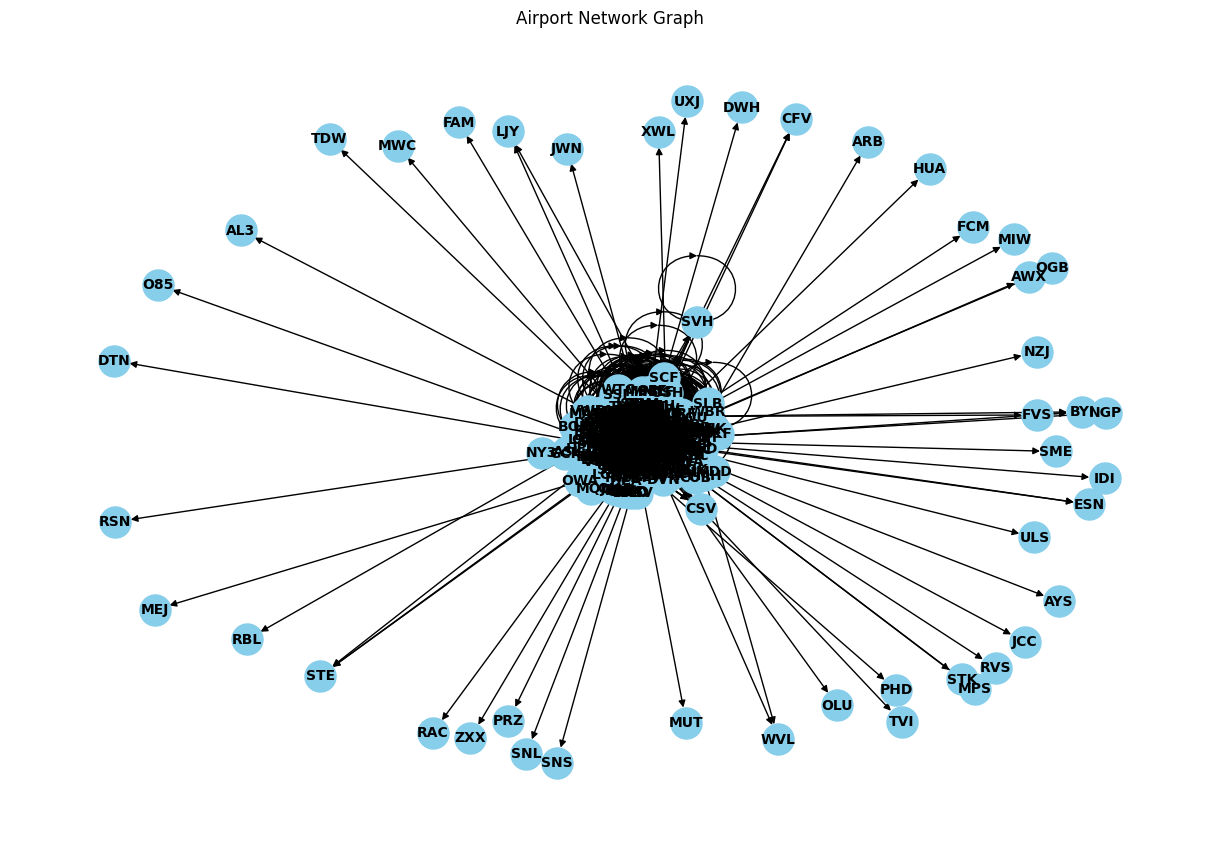

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# initializing the graph
G = nx.DiGraph()

# Adding edges 
for index, row in df.iterrows():
    G.add_edge(row['Origin_airport'], row['Destination_airport'])

# plotting the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positioning the nodes
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Airport Network Graph')
plt.show()


In [38]:
def dijkstra_algorithm(graph, start, end):
    # line_tuple is the list of tuples containing distance, node, path. 
    line_tuple = [(0, start, [])]
    visited_nodes = set()
    
    while line_tuple:
        # looking for the tuple with the smallest distance, so we are sorting by distance
        line_tuple.sort(key=lambda x: x[0]) 
        current_distance, current_node, path = line_tuple.pop(0)  # Removing the smallest
        
        # If a node as been visited already we skip it.
        if current_node in visited_nodes:
            continue
        
        # marking the current node as visited
        visited_nodes.add(current_node)
        # now we can add the current node to the path
        path = path + [current_node]
        # If we reach the destination node, return the result
        if current_node == end:
            return path, current_distance
        
        # Checking all the neighbors of the current node
        for neighbor, edge in graph[current_node].items():
            if neighbor not in visited_nodes:
                # getting the total distance to the neighbor
                total_distance = current_distance + edge['weight']
                
                # Adding the neighbor to the queue
                line_tuple.append((total_distance, neighbor, path))
    
    # Instead if no path is found, return None 
    return None


In [6]:
def analyze_centrality(flight_network, airport):
    centralities = {}

    # Betweenness Centrality
    nodes = list(flight_network.nodes)
    num_nodes = len(nodes)
    betweenness = 0
    for source in nodes:
        for target in nodes:
            if source != target and source != airport and target != airport:
                # Calculating shortest path 
                shortest_path, _ = dijkstra_algorithm(flight_network, source, target)
                if shortest_path:
                    total_paths = 1  # Considering just one shortest path
                    paths_through_airport = 1 if airport in shortest_path else 0
                    betweenness += paths_through_airport / total_paths
    centralities['betweenness'] = betweenness / ((num_nodes - 1) * (num_nodes - 2))

    # Closeness Centrality
    total_distance = 0
    reachable_nodes = 0
    for target in nodes:
        if target != airport:
            # Calculating shortest path 
            path, distance = dijkstra_algorithm(flight_network, airport, target)
            if path: 
                total_distance += distance
                reachable_nodes += 1
                if reachable_nodes > 0:
                    centralities['closeness'] = reachable_nodes / total_distance
                else:
                    centralities['closeness'] = 0  # If no nodes are reachable, centrality is zero

    # Degree Centrality
    degree = len(list(flight_network.neighbors(airport)))
    centralities['degree'] = degree / (num_nodes - 1)

    # PageRank
    alpha = 0.9
    max_iterations = 100
    tolerance = 1e-6
    page_rank = {node: 1 / num_nodes for node in nodes}
    for _ in range(max_iterations):
        new_page_rank = {}
        for node in nodes:
            rank_sum = 0
            for neighbor in flight_network.predecessors(node):
                rank_sum += page_rank[neighbor] / len(list(flight_network.neighbors(neighbor)))
            new_page_rank[node] = (1 - alpha) / num_nodes + alpha * rank_sum
        if all(abs(new_page_rank[node] - page_rank[node]) < tolerance for node in nodes):
            break
        page_rank = new_page_rank
    centralities['pagerank'] = page_rank.get(airport, 0)

    return centralities


In [15]:
# Calling the function by giving a specific airport 
all_centralities = analyze_centrality(G, 'CSV')

In [65]:
# Getting the result of the centrality measures, the neighbors and the predecessors to get more insights
print(all_centralities,)
print(list(G.neighbors('CSV')))
print(list(G.predecessors('CSV')))

{'betweenness': 0.0013483855724615431, 'closeness': 0.4122448979591837, 'degree': 0.013774104683195593, 'pagerank': 0.0003242779650791849}
['FNT', 'DAL', 'BUF', 'YIP', 'CLE', 'SHV', 'SBN', 'AXV', 'ILG', 'TVI']
['YIP', 'MEM', 'RDU', 'BRO', 'MZZ', 'LYH', 'OPF']


#### Write a function compare_centralities(flight_network) to:
- Compute and compare centrality values for all nodes in the graph.
- Plot centrality distributions (histograms for each centrality measure).
- Return the top 5 airports for each centrality measure.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

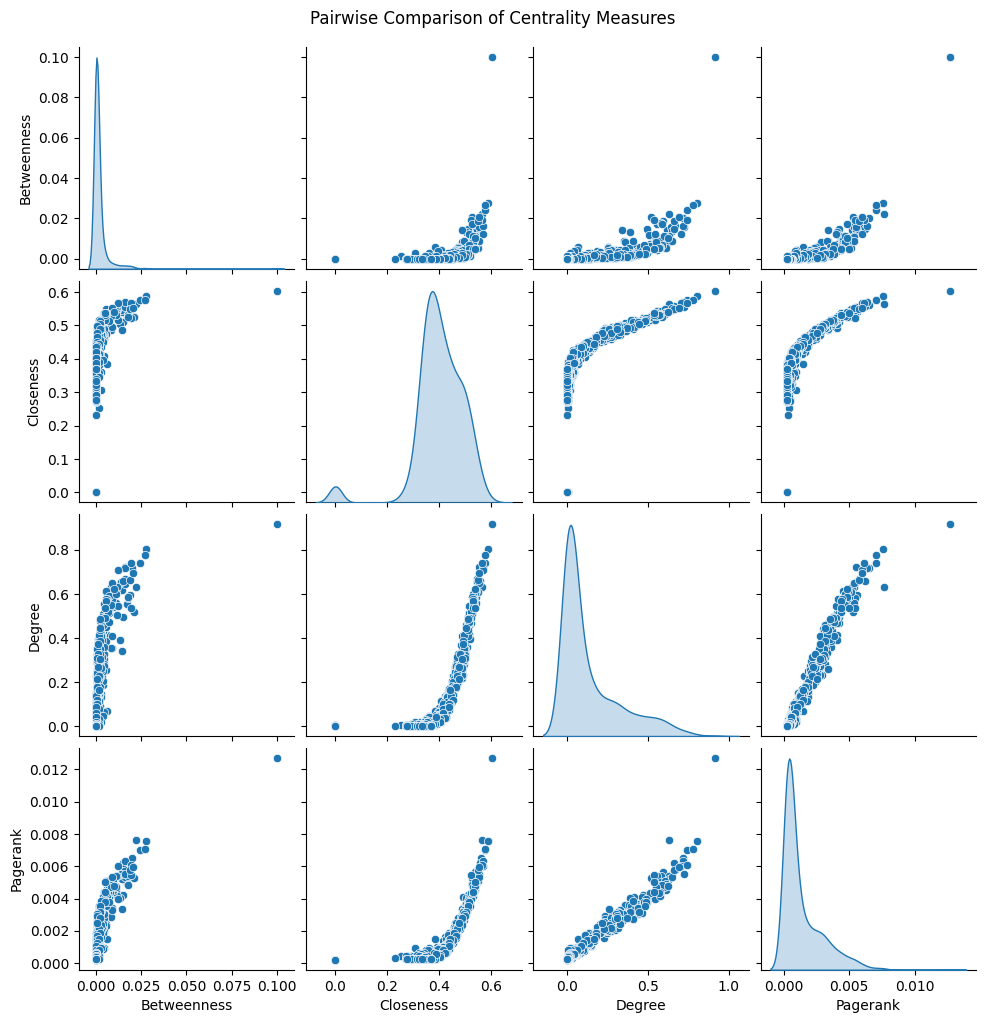

Correlation Matrix:
              Betweenness  Closeness    Degree  Pagerank
Betweenness     1.000000   0.412796  0.674272  0.765101
Closeness       0.412796   1.000000  0.727902  0.717491
Degree          0.674272   0.727902  1.000000  0.981072
Pagerank        0.765101   0.717491  0.981072  1.000000


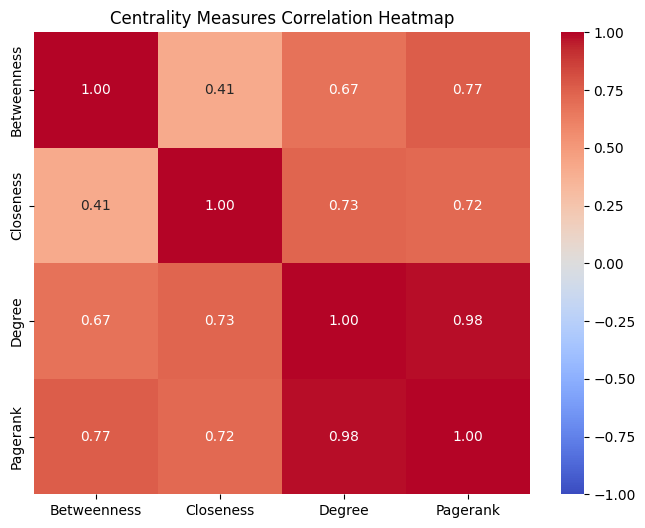

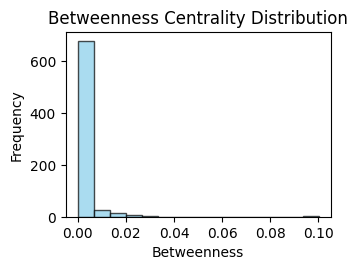

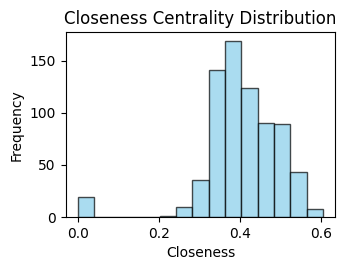

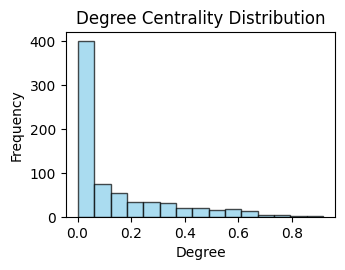

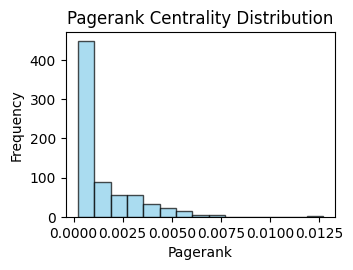

Top 5 Airports by Betweenness:
    Airport  Betweenness
196     YIP     0.100109
104     MSP     0.027676
131     MEM     0.026827
100     MCI     0.024124
99      SHV     0.022159

Top 5 Airports by Closeness:
    Airport  Closeness
196     YIP   0.604342
104     MSP   0.587122
131     MEM   0.577567
100     MCI   0.575486
128     STL   0.568824

Top 5 Airports by Degree:
    Airport    Degree
196     YIP  0.915978
104     MSP  0.803030
131     MEM  0.776860
100     MCI  0.742424
183     ATL  0.742424

Top 5 Airports by Pagerank:
    Airport  Pagerank
196     YIP  0.012708
99      SHV  0.007642
104     MSP  0.007559
131     MEM  0.007049
100     MCI  0.007032


Rank Comparison:
     Airport  Betweenness_Rank  Closeness_Rank  Degree_Rank  Pagerank_Rank
0       MHK              67.0           151.5        156.5          135.0
1       AMW             643.0           677.0        649.0          629.0
2       EUG             153.0           197.5        179.5          181.0
3       RDM    

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def compare_centralities_relationships(flight_network):
    centrality_df = []

    for airport in flight_network.nodes:
        # # Compute centralities for each airport by calling the previous function
        centralities = analyze_centrality(flight_network, airport)
        centrality_df.append({
            'Airport': airport,
            'Betweenness': centralities['betweenness'],
            'Closeness': centralities['closeness'],
            'Degree': centralities['degree'],
            'Pagerank': centralities['pagerank'],
        })
        
    # Pairwise scatter plots for centrality measures
    sns.pairplot(centrality_df[['Betweenness', 'Closeness', 'Degree', 'Pagerank']], diag_kind="kde")
    plt.suptitle("Pairwise Comparison of Centrality Measures", y=1.02)
    plt.show()

    # Correlation matrix
    corr_matrix = centrality_df[['Betweenness', 'Closeness', 'Degree', 'Pagerank']].corr(method='pearson')
    print("Correlation Matrix:\n", corr_matrix)

    # Heatmap for correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
    plt.title("Centrality Measures Correlation Heatmap")
    plt.show()

    #plt.figure(figsize=(14, 10))
    # Histograms 
    for i, col in enumerate(['Betweenness', 'Closeness', 'Degree', 'Pagerank'], start=1):
        plt.subplot(2, 2, i)
        plt.hist(centrality_df[col], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'{col} Centrality Distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    for col in ['Betweenness', 'Closeness', 'Degree', 'Pagerank']:
        print(f"Top 5 Airports by {col}:")
        print(centrality_df.nlargest(5, col)[['Airport', col]])
        print()

    # Rank comparison
    for col in ['Betweenness', 'Closeness', 'Degree', 'Pagerank']:
        centrality_df[f'{col}_Rank'] = centrality_df[col].rank(ascending=False)

    rank_df = centrality_df[['Airport', 'Betweenness_Rank', 'Closeness_Rank', 'Degree_Rank', 'Pagerank_Rank']]
    print("\nRank Comparison:\n", rank_df)

    return rank_df

# Calling the function
rank_comparison = compare_centralities_relationships(G)



### Interpretation of the above results 

Betweenness centrality measures how often a node (airport) appears on the shortest path between two other nodes, thus an high betweenness means the airport is more central to connecting other airports in the network. On the other hand the closeness centrality measures how close an airport is to all other airports, calculated as the inverse of the sum of the shortest path distances from the airport to all other airports. A low rank means the airport is more central in terms of quick access to other airports.
The degree centrality simply counts how many direct connections (edges) an airport has. A higher degree means the airport is directly connected to many other airports.
While the PageRank is a measure of the importance of a node based on the structure of the network, where connected airports "vote" on the importance of each airport.

Degree and Closeness Centralities are strongly correlated, meaning that well-connected nodes are also likely to be more accessible across the network.
Betweenness Centrality is relatively independent. In our results it stands out since it has a lower correlations with the other measures. 
Pagerank and Degree Centralities are tightly linked, with Pagerank highlighting the importance of nodes based on their connections' quality. Nodes with high Degree Centrality also tend to have high Pagerank

By looking at the heatmap we can see that each measure on the diagonal, has a perfect correlation with itself (1.00 on the diagonal).
Betweenness vs. Closeness (0.41): shows a weak positive correlation suggesting that being a key intermediary (Betweenness) does not strongly align with being close to all other nodes (Closeness).
Betweenness vs. Degree (0.67): shows a moderate positive correlation indicating that nodes with more connections are somewhat likely to also serve as intermediaries between other nodes.
Betweenness vs. Pagerank (0.77): shows a strong positive correlation suggesting that influential nodes (Pagerank) also play a role as intermediaries in the network.
Closeness vs. Degree (0.73): show strong positive correlation. Nodes with more connections tend to be closer to other nodes in the network, as they can reach others more directly.
Closeness vs. Pagerank (0.72): shows a strong positive correlation, indicating that central nodes in terms of proximity to others also have higher influence scores.
Degree vs. Pagerank (0.98): this shows a very strong positive correlation. Indicating a very close relationship between the number of connections a node has (Degree) and its influence in the network (Pagerank).

Airports with low ranks in Betweenness or Closeness may not be crucial for connecting distant airports, while those with higher Degree and Pagerank ranks might be more well-connected or important in the network.




#### Ask LLM (eg. ChatGPT) to suggest alternative centrality measures that might be relevant to this task.

The LLM suggested the eigenvector centrality which measures a node's influence based on its connections to other highly connected nodes.The eigenvector centrality is suitable for determining airports that are influential due to their connection to major hubs.


In [9]:
def eigenvector_centrality(flight_network): 
    return nx.eigenvector_centrality(flight_network)
# Getting all the eigenvector centrality for each airport 
eigen_centrality = eigenvector_centrality(G)
for airports,centrality in eigen_centrality.items(): 
    print(f"{airports}: {centrality:.4f}")

MHK: 0.0434
AMW: 0.0003
EUG: 0.0323
RDM: 0.0173
MFR: 0.0196
SEA: 0.0746
PDX: 0.0636
LMT: 0.0076
SFO: 0.0702
LAX: 0.0839
EAT: 0.0040
YKM: 0.0280
EKO: 0.0579
SLE: 0.0038
GEG: 0.0536
RDD: 0.0175
LWS: 0.0227
AST: 0.0015
CLM: 0.0028
PDT: 0.0051
SJC: 0.0653
ACV: 0.0069
PUW: 0.0205
SMF: 0.0533
FLL: 0.0836
PHX: 0.0894
BFI: 0.0601
GGG: 0.0554
GTF: 0.0391
FAT: 0.0474
TUS: 0.0828
MWH: 0.0230
BIL: 0.0477
DFW: 0.0985
RBG: 0.0010
SLC: 0.0892
CPR: 0.0354
RNO: 0.0724
FBK: 0.0032
ANC: 0.0450
BIF: 0.0365
CIC: 0.0031
SAF: 0.0117
ABQ: 0.0755
FSM: 0.0518
LAS: 0.0922
DQF: 0.0257
ICT: 0.0865
AZA: 0.0332
DLH: 0.0549
CEC: 0.0026
OKC: 0.0968
SAN: 0.0674
STS: 0.0075
DRO: 0.0142
OAK: 0.0733
IAH: 0.0931
ELP: 0.0801
DBQ: 0.0210
HLN: 0.0235
TUL: 0.0851
OMA: 0.0828
ACT: 0.0737
BTM: 0.0076
AUS: 0.0810
PIA: 0.0797
CWA: 0.0395
PUB: 0.0567
FOE: 0.0529
COS: 0.0769
GJT: 0.0593
LBF: 0.0229
SPS: 0.0660
CYS: 0.0520
ABR: 0.0065
BRD: 0.0096
AMA: 0.0651
ROW: 0.0206
BIS: 0.0350
MSO: 0.0362
GCC: 0.0058
LBB: 0.0633
LBL: 0.0125
MAF:

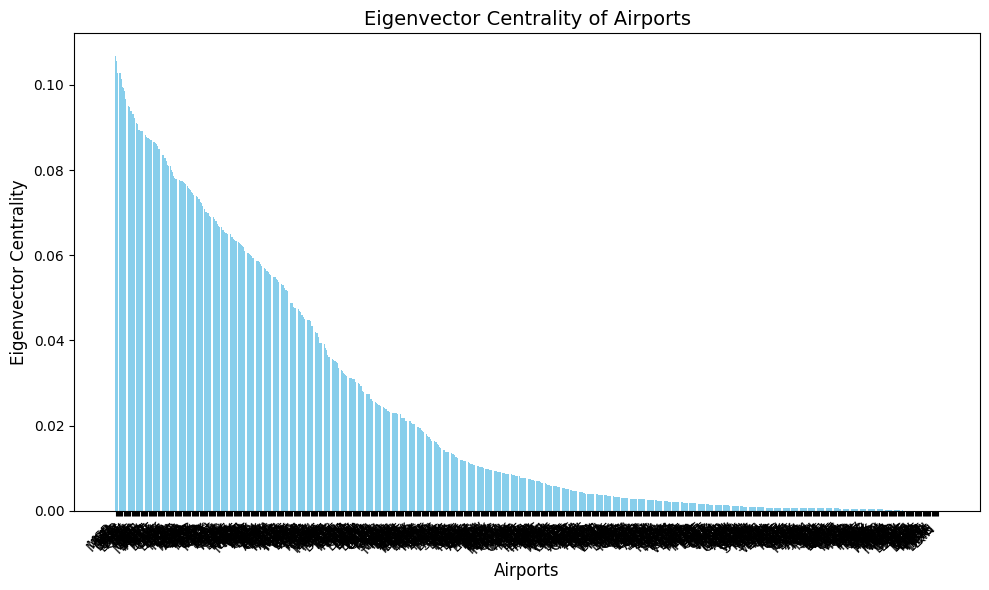

In [10]:
sorted_eigen_centrality = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)
# Extract airport names and their corresponding centrality scores
airports, centralities = zip(*sorted_eigen_centrality)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(airports, centralities, color='skyblue')
plt.xlabel('Airports', fontsize=12)
plt.ylabel('Eigenvector Centrality', fontsize=12)
plt.title('Eigenvector Centrality of Airports', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
sorted_eigen_centrality[0:5]
# these are the top 5 airports. 

[('MSP', 0.10674817461884903),
 ('MEM', 0.10569415266554277),
 ('IND', 0.10281197138047611),
 ('STL', 0.10269245362325259),
 ('ATL', 0.10267595835715153)]

##### Implement one of these measures suggested by the LLM, compare its results to the centralities you've already computed, and analyze whether it adds any new insights.


    Airport  Betweenness  Closeness    Degree  Pagerank   Eigenvector
104     MSP     0.027676   0.587122  0.803030  0.007849  1.067482e-01
131     MEM     0.026827   0.577567  0.776860  0.007327  1.056942e-01
136     IND     0.012339   0.567813  0.706612  0.006353  1.028120e-01
128     STL     0.016078   0.568824  0.717631  0.006639  1.026925e-01
183     ATL     0.019134   0.566303  0.742424  0.006412  1.026760e-01
..      ...          ...        ...       ...       ...           ...
714     DQC     0.000000   0.000000  0.001377  0.000147  5.374584e-19
708     TMA     0.000000   0.000000  0.002755  0.000147  5.374584e-19
719     LXN     0.000000   0.000000  0.001377  0.000147  5.374584e-19
667     PMH     0.000000   0.000000  0.001377  0.000147  5.374584e-19
663     WTC     0.000000   0.000000  0.001377  0.000147  5.374584e-19

[727 rows x 6 columns]


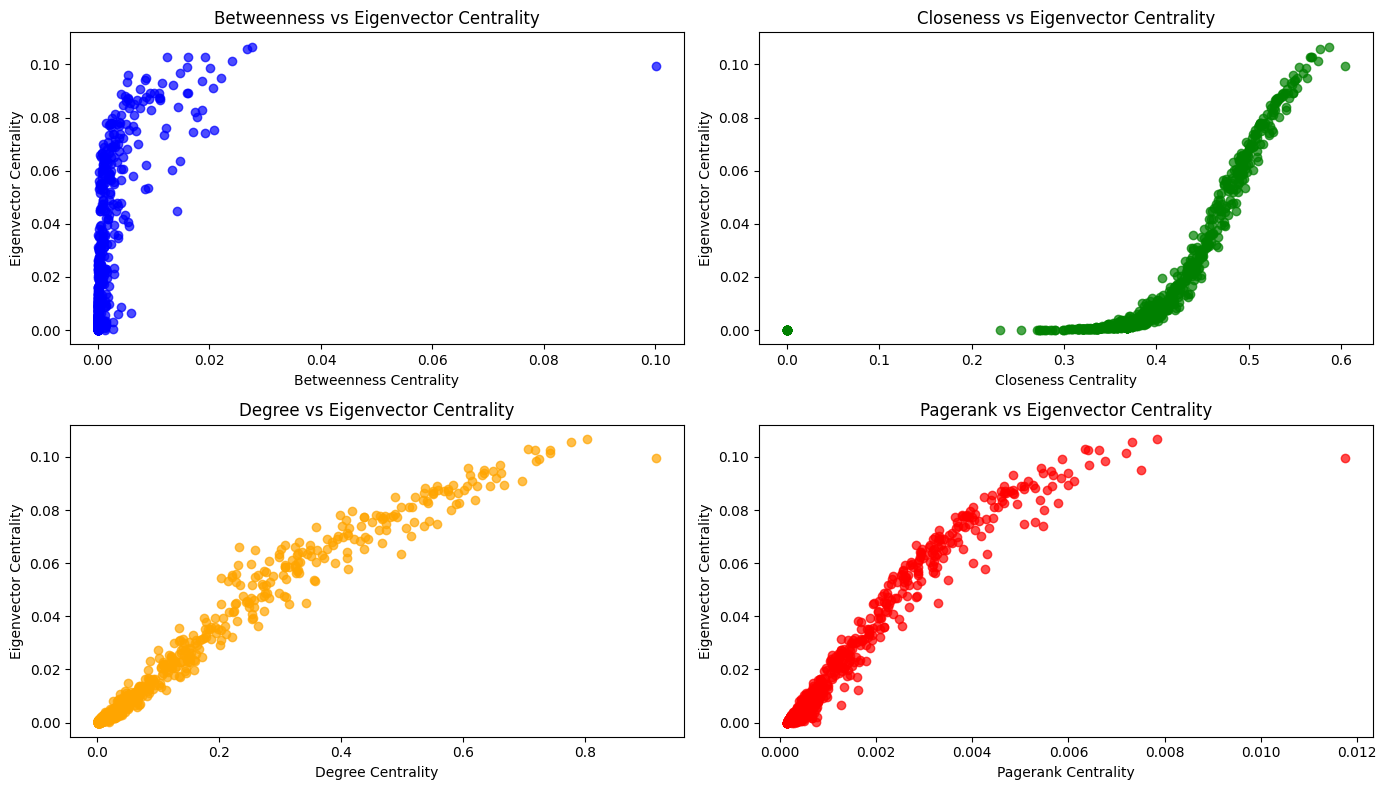

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Compute centralities
centralities = analyze_centrality(flight_network, airport)
centralities_df = pd.DataFrame({
    'Airport': list(eigenvector.keys()),
    'Betweenness': list(centralities['betweenness']),
    'Closeness': list(centralities['closeness']),
    'Degree': list(centralities['degree']),
    'Pagerank': list(centralities['pagerank']),
    'Eigenvector': list(centralities['eigenvector_centrality'])
})

# Sort the DataFrame by Eigenvector centrality for better comparison
centralities_df = centralities_df.sort_values(by='Eigenvector', ascending=False)

# Display the DataFrame
print(centralities_df)

# Plot comparisons using scatter plots
plt.figure(figsize=(14, 8))

# Betweenness vs Eigenvector Centrality
plt.subplot(2, 2, 1)
plt.scatter(centralities_df['Betweenness'], centralities_df['Eigenvector'], color='blue', alpha=0.7)
plt.title('Betweenness vs Eigenvector Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Eigenvector Centrality')

# Closeness vs Eigenvector Centrality
plt.subplot(2, 2, 2)
plt.scatter(centralities_df['Closeness'], centralities_df['Eigenvector'], color='green', alpha=0.7)
plt.title('Closeness vs Eigenvector Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Eigenvector Centrality')

# Degree vs Eigenvector Centrality
plt.subplot(2, 2, 3)
plt.scatter(centralities_df['Degree'], centralities_df['Eigenvector'], color='orange', alpha=0.7)
plt.title('Degree vs Eigenvector Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality')

# Pagerank vs Eigenvector Centrality
plt.subplot(2, 2, 4)
plt.scatter(centralities_df['Pagerank'], centralities_df['Eigenvector'], color='red', alpha=0.7)
plt.title('Pagerank vs Eigenvector Centrality')
plt.xlabel('Pagerank Centrality')
plt.ylabel('Eigenvector Centrality')

plt.tight_layout()
plt.show()


In the dataset, the eigenvector centrality seems to vary significantly across airports. For example, airports like MSP, MEM, and IND have a relatively high eigenvector values (which goes around 0.1), indicating they are well-connected to other important airports in the network. 
In contrast, airports like DQC, TMA, LXN, PMH, and WTC have an extremely low eigenvector centrality values close to zero, suggesting they have fewer or less significant connections in the network.
Airports with an high eigenvector centrality are central airports, not only due to the value of degree but also because their connections lead to other important airports. 
This indicates that these airports are hubs with influence in the network and that they may 
play key roles in the flow of passengers.
Airports with a low eigenvector centrality are most likely situated on the periphery of the network. Their connections are either sparse or not to other highly influential airports.



**EXERCISE3**

In [60]:
def BestRoute(flight_network, origin, destination, date):
    # getting only the flights of a specific day 
    filtered_flight = flight_network[flight_network["Fly_date"] == date]
    # constructing the graph 
    G = nx.DiGraph()
    for _, row in filtered_flight.iterrows():
        G.add_edge(row['Origin_airport'], row['Destination_airport'], weight=row['Distance'])
        
    # getting the origin and destination airports 
    origin_airport = set(filtered_flight[filtered_flight['Origin_airport'] == origin]['Origin_airport'])
    destination_airport = set(filtered_flight[filtered_flight['Destination_airport'] == destination]['Destination_airport'])

    # empty list 
    df_result = []
    # calculating the shortest path
    for origin in origin_airport: 
        for destination in destination_airport:     
            path, total_distance = dijkstra_algorithm(G, origin, destination)
            if path:
                df_result.append({
                    'origin_city_airport': origin,
                    'destination_city_airport' : destination,
                    'best_route': " → ".join(path)
    })
            else: 
                df_result.append({
                    'origin_city_airport': origin,
                    'destination_city_airport': destination,
                    'best_route': "No route found"
    })
    
    result_df = pd.DataFrame(df_result)

    # print or return results
    if result_df.empty:
        print("No Route found")
    else:
        for _, row in result_df.iterrows():
            print('The best route is:  ' + f"{row['best_route']}"+ '. Below the descripted information')
            
    return result_df

In [61]:
BestRoute(df,"COS","EKO","2006-12-01")

The best route is:  COS → SLC → EKO. Below the descripted information


,origin_city_airport,destination_city_airport,best_route
0,COS,EKO,COS → SLC → EKO
